[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/khigashi1987/test_genome_tracks/blob/main/Test_genome_tracks.ipynb)


In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

In [ ]:
!conda install -y -c bioconda coolbox

In [ ]:
#!wget http://palaeo.nig.ac.jp/Resources/test/data.zip
#!unzip data.zip

In [ ]:
import gdown
gdown.download('https://drive.google.com/uc?id=1-mZSoBVJmcJ2Rur8JARXDCZMxxwUd7aV', 'data.zip', quiet=False)
!unzip data.zip

In [3]:
from coolbox.api import *

In [4]:
!ls ./data

GSE202471_chr14.cool H3K4me3_chr15.bw     hg19_refgenes.bed
H3K27ac_chr15.bw     HMG20A_1_chr15.bw
H3K4me1_chr15.bw     HMG20A_2_chr15.bw


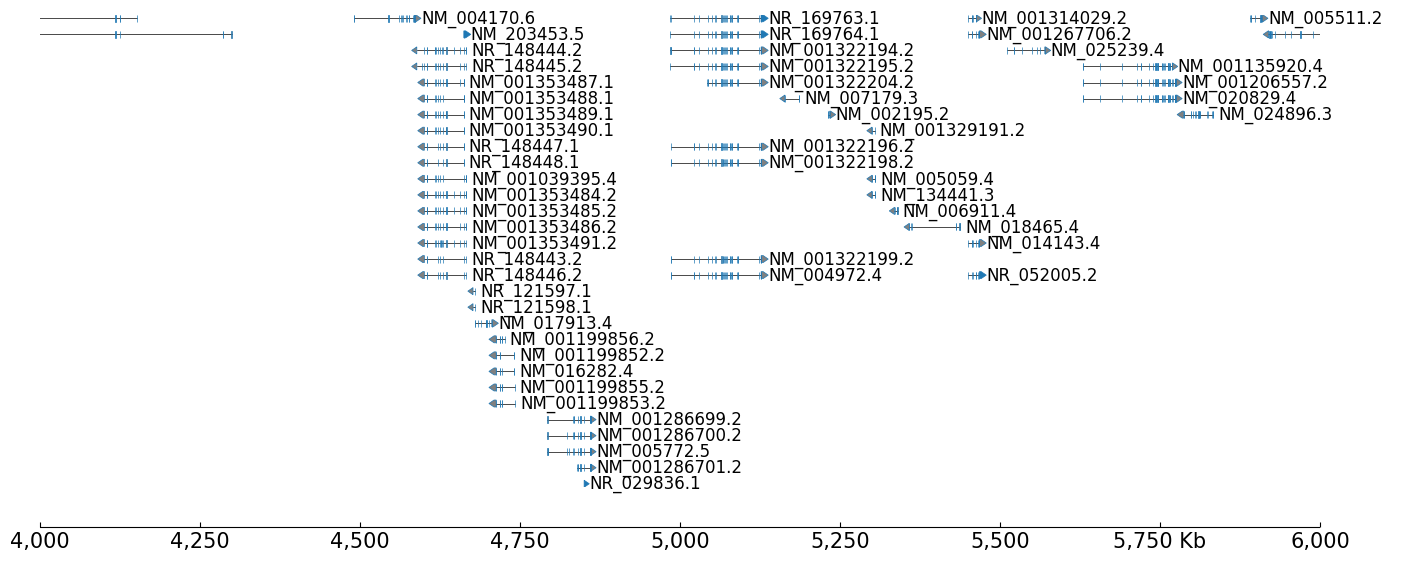

In [6]:
frame = BED('./data/hg19_refgenes.bed') + \
            TrackHeight(12) + \
        XAxis()
frame.plot("chr9:4000000-6000000")

[W::hts_idx_load3] The index file is older than the data file: ./data/hg19_refgenes.bed.bgz.tbi


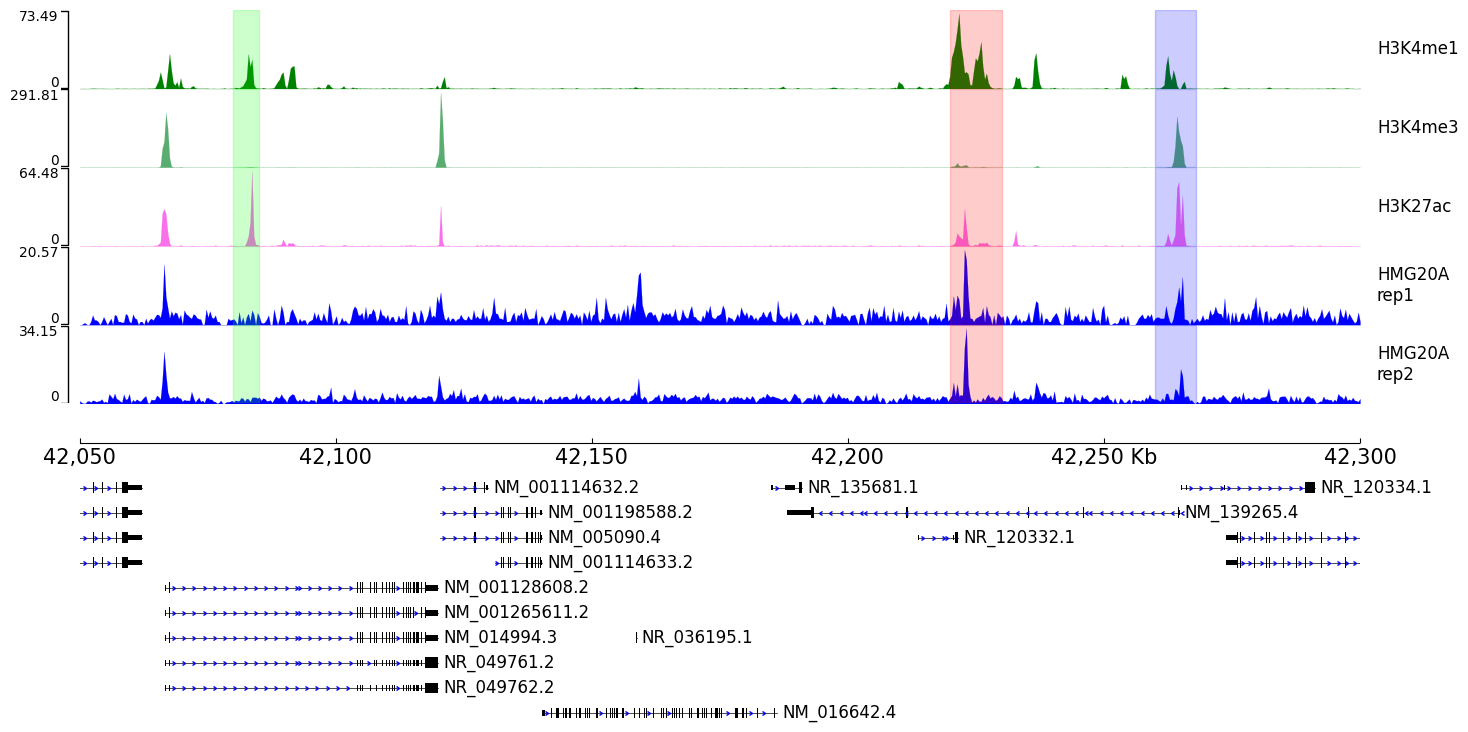

In [22]:
# 3つのヒストン修飾のChIP-seq結果を描画。
# 長い足し算になるので改行を無視するバック
# スラッシュ記号を使って、適宜わかりやすく
# 改行する
frame1 = BigWig('./data/H3K4me1_chr15.bw') + \
                Color('green') + \
                MinValue(0.0) + \
                Title('H3K4me1') + \
        BigWig('./data/H3K4me3_chr15.bw') + \
                Color('#5aad70') + \
                MinValue(0.0) + \
                Title('H3K4me3') + \
        BigWig('./data/H3K27ac_chr15.bw') + \
                Color('#fa70ea') + \
                MinValue(0.0) + \
                Title('H3K27ac')

# 2つのHMG20Aタンパク質のChIP-seq結果
# with文で両方のトラックに青色を指定。
with Color('blue'):
    frame2 = BigWig('./data/HMG20A_1_chr15.bw') + \
                MinValue(0.0) + \
                Title('HMG20A\nrep1') + \
             BigWig('./data/HMG20A_2_chr15.bw') + \
                MinValue(0.0) + \
                Title('HMG20A\nrep2')

# frame1とfram2を分けて定義したが、ここで
# 全部足すことで5段のトラックを用意したことになる
frame = frame1 + frame2

# 掛け算演算子を利用した複数トラックの同時網掛け
frame *= HighLights('chr15:42080000-42085000',
                color='#00ff00', alpha=0.2)
frame *= HighLights('chr15:42220000-42230000',
                color='#ff0000', alpha=0.2)
frame *= HighLights('chr15:42260000-42268000',
                color='#0000ff', alpha=0.2)

# ゲノムの座標軸（XAxis）と遺伝子のトラック（BED）
# を5段のトラックの下にさらに足す
frame = frame + \
        XAxis() + \
        BED('./data/hg19_refgenes.bed', 
            gene_style='normal',
            color='black') + \
            TrackHeight(6)

# 座標を指定してプロット
frame.plot('chr15:42050000-42300000')

# 画像ファイルとして保存する場合は少し面倒だが以下で可能
# Browser(frame, init_range='chr15:42050000-42300000').save('./chip_tracks.pdf')

[WARNING:wrap.py:315 -                fetch()] No column 'bins/weight'found. Use ``cooler.balance_cooler`` to calculate balancing weights or set balance=False.
[WARNING:wrap.py:316 -                fetch()] Data is not balanced, force to use unbalanced matrix.


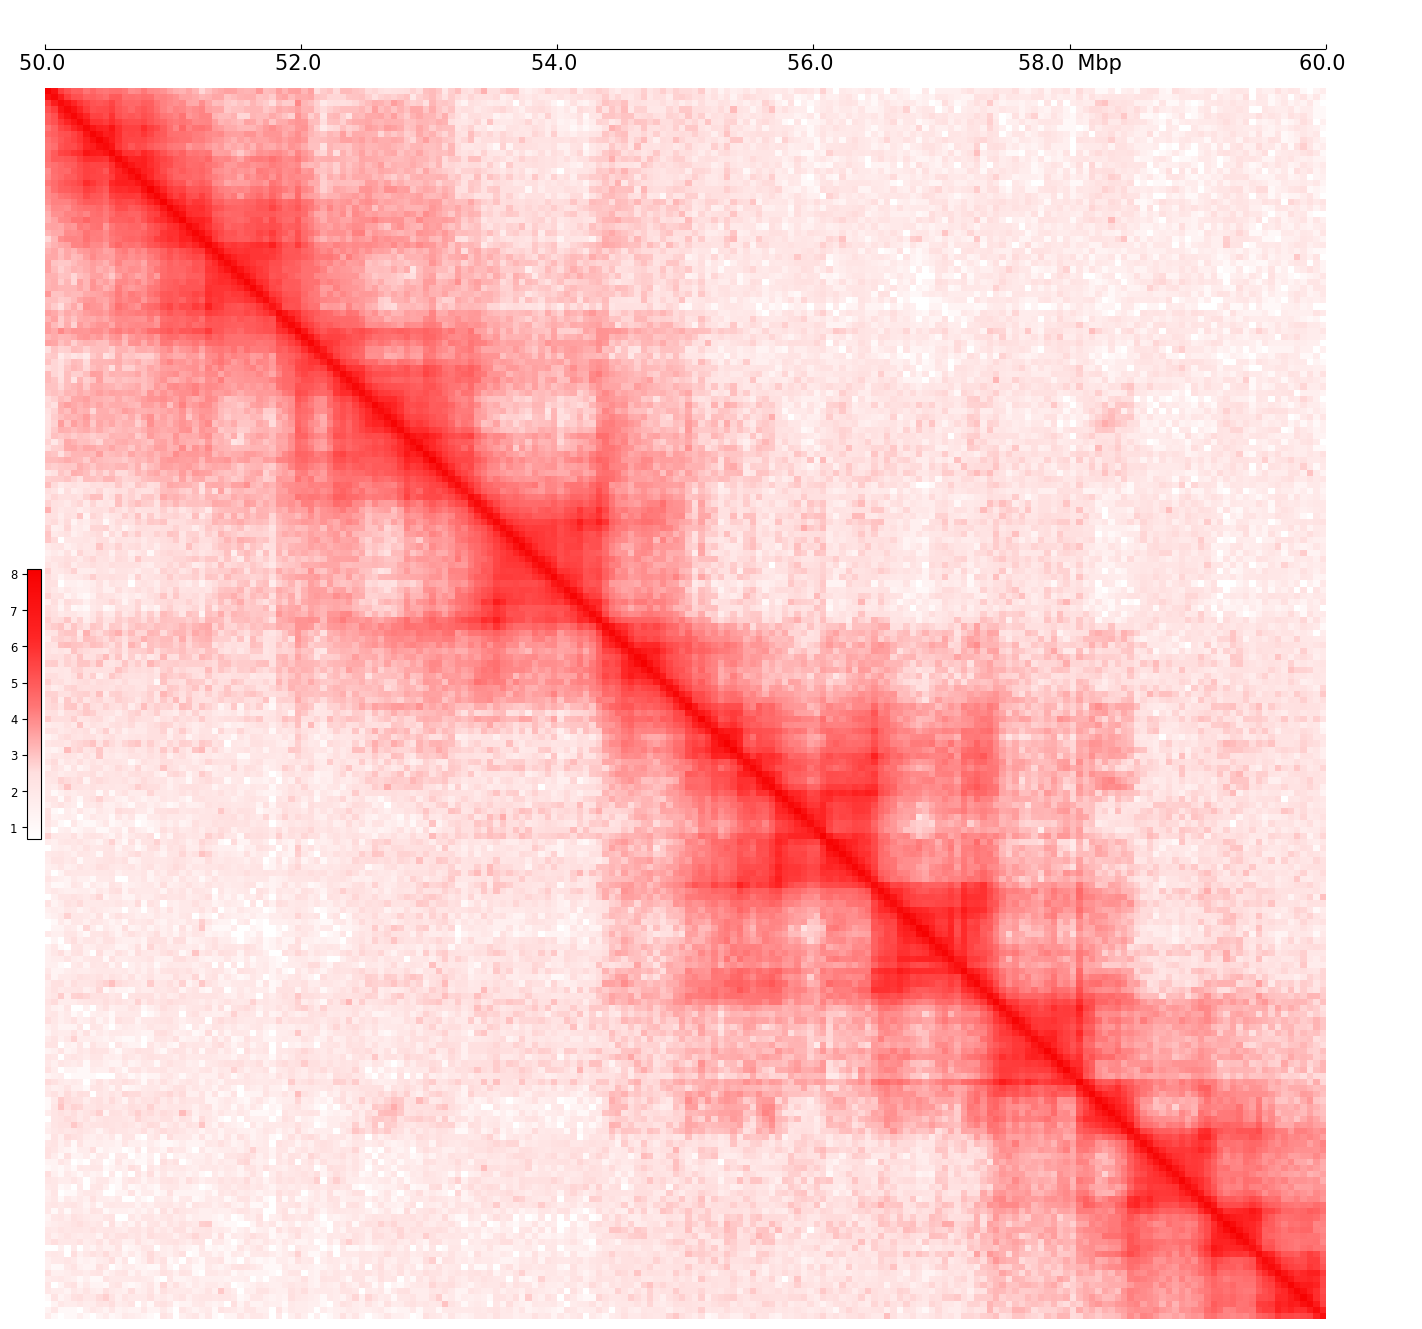

In [10]:
frame = XAxis() + \
        Cool('./data/GSE202471_chr14.cool', style='matrix')
frame.plot("chr14:50000000-60000000")

[WARNING:wrap.py:315 -                fetch()] No column 'bins/weight'found. Use ``cooler.balance_cooler`` to calculate balancing weights or set balance=False.
[WARNING:wrap.py:316 -                fetch()] Data is not balanced, force to use unbalanced matrix.


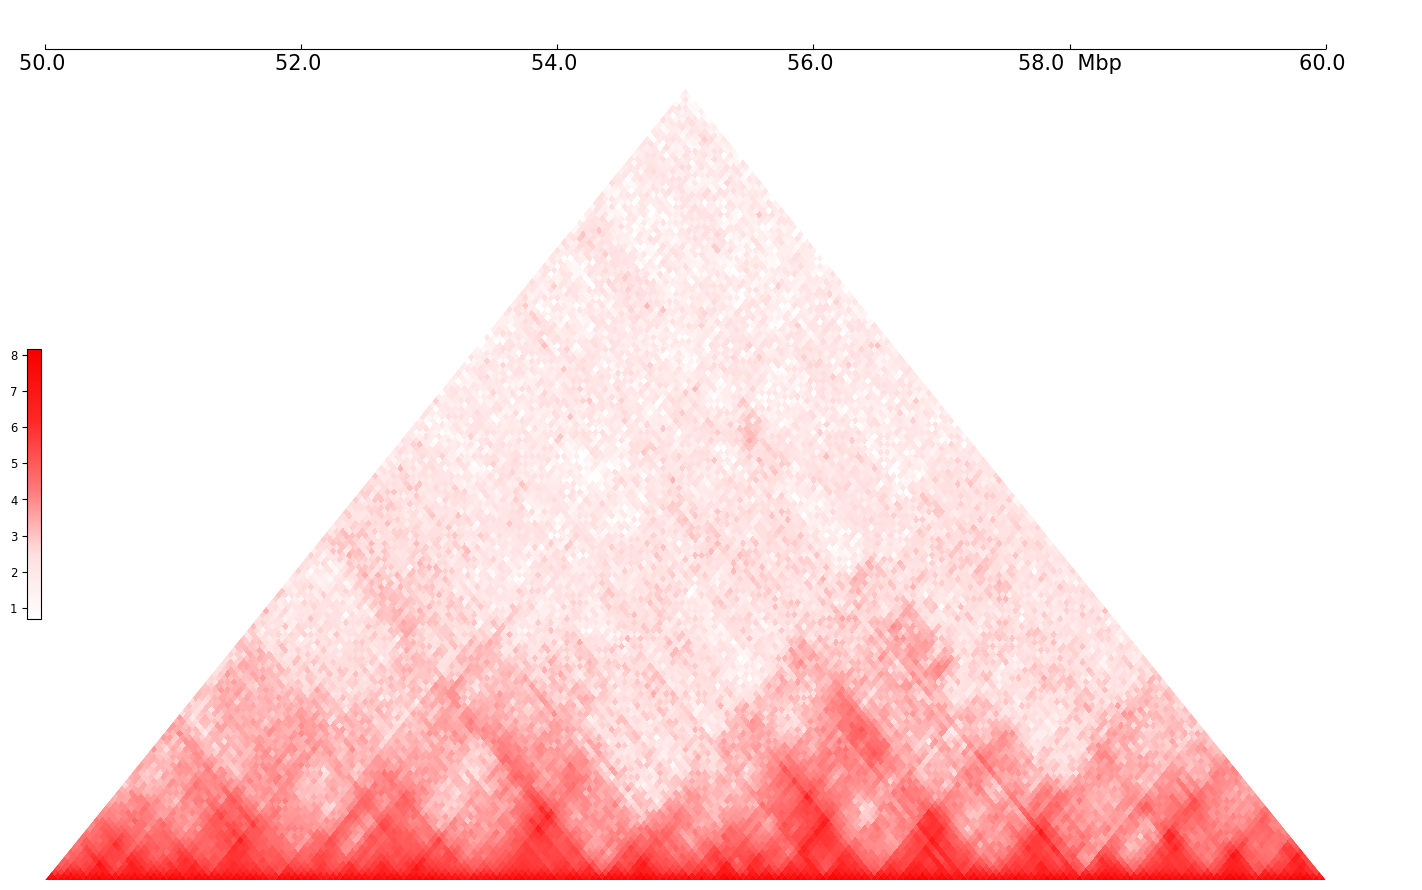

In [11]:
frame = XAxis() + \
        Cool('./data/GSE202471_chr14.cool', style='triangular')
frame.plot("chr14:50000000-60000000")

[WARNING:wrap.py:315 -                fetch()] No column 'bins/weight'found. Use ``cooler.balance_cooler`` to calculate balancing weights or set balance=False.
[WARNING:wrap.py:316 -                fetch()] Data is not balanced, force to use unbalanced matrix.


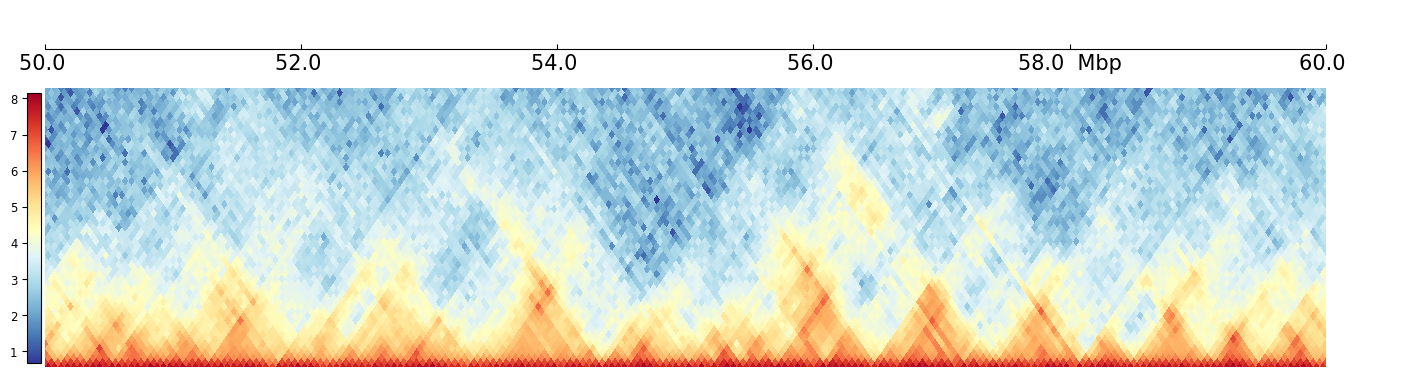

In [15]:
frame = XAxis() + \
        Cool('./data/GSE202471_chr14.cool', style='window', depth_ratio=0.3, cmap="RdYlBu_r")
frame.plot("chr14:50000000-60000000")

[WARNING:wrap.py:315 -                fetch()] No column 'bins/weight'found. Use ``cooler.balance_cooler`` to calculate balancing weights or set balance=False.
[WARNING:wrap.py:316 -                fetch()] Data is not balanced, force to use unbalanced matrix.


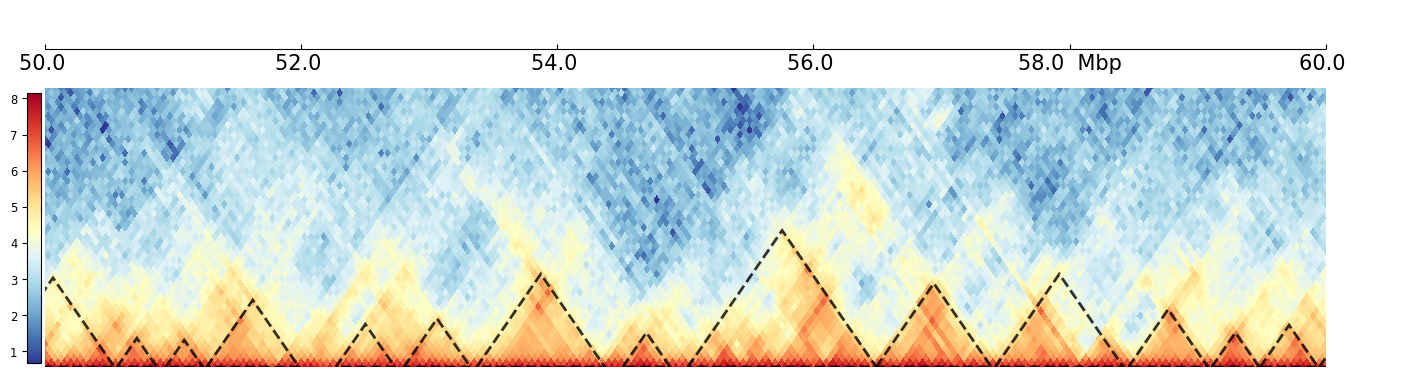

In [16]:
frame = XAxis() + \
        Cool('./data/GSE202471_chr14.cool', style='window', depth_ratio=0.3, cmap="RdYlBu_r") + \
        TADCoverage('./data/GSE202471_TADs.bed', border_only=True, border_color='black', alpha=0.8)
frame.plot("chr14:50000000-60000000")

[WARNING:wrap.py:315 -                fetch()] No column 'bins/weight'found. Use ``cooler.balance_cooler`` to calculate balancing weights or set balance=False.
[WARNING:wrap.py:316 -                fetch()] Data is not balanced, force to use unbalanced matrix.
[W::hts_idx_load3] The index file is older than the data file: ./data/GSE202471_TADs.bed.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: ./data/hg19_refgenes.bed.bgz.tbi


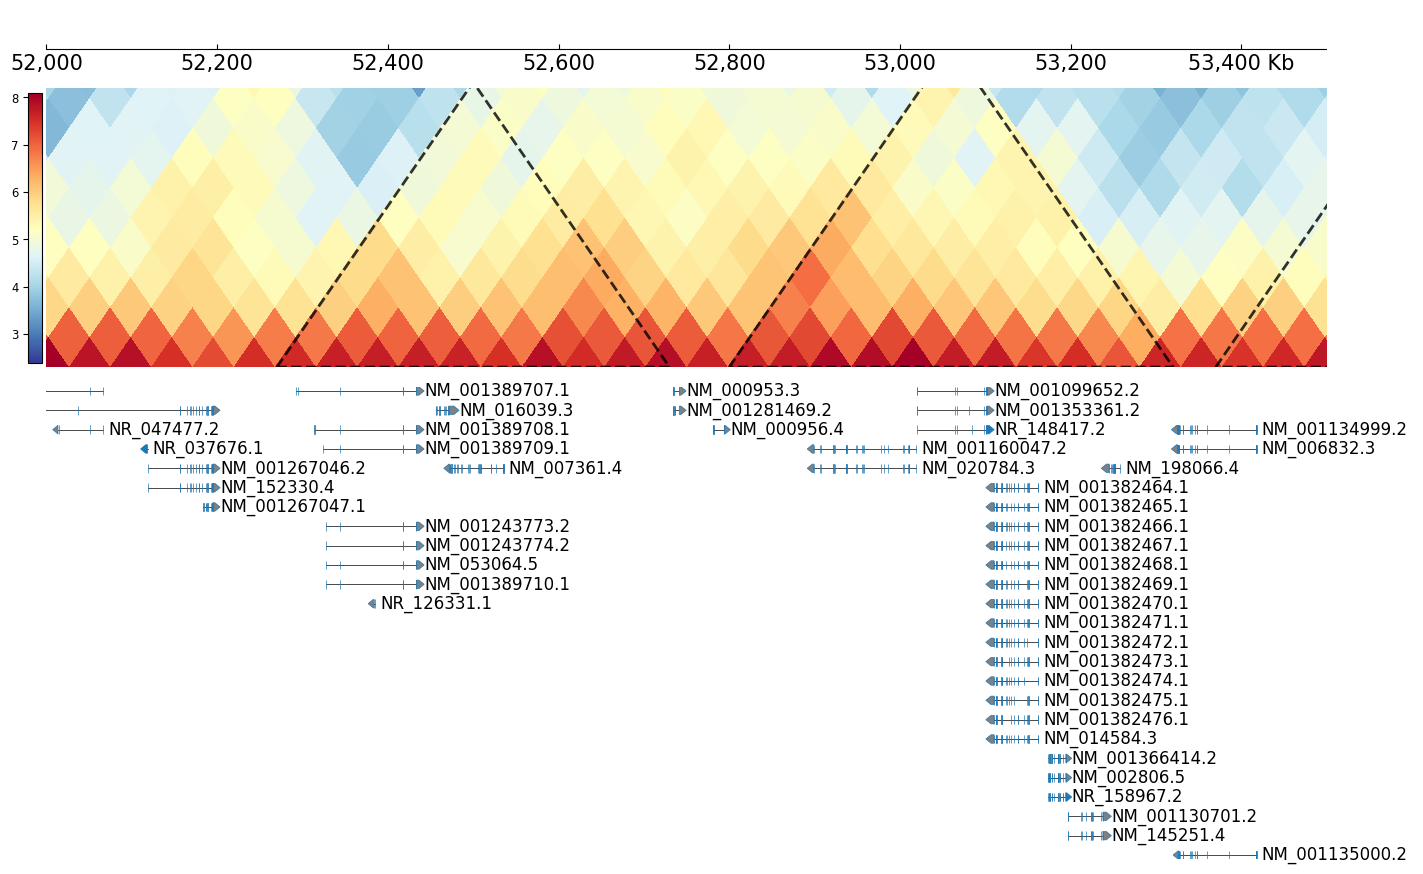

In [19]:
frame = XAxis() + \
        Cool('./data/GSE202471_chr14.cool', style='window', depth_ratio=0.3, cmap="RdYlBu_r") + \
        TADCoverage('./data/GSE202471_TADs.bed', border_only=True, border_color='black', alpha=0.8) + \
        Spacer(0.5) + \
        BED('./data/hg19_refgenes.bed') + \
        TrackHeight(12)
frame.plot("chr14:52000000-53500000")